# **Nested Summarization With Heading Hierarchy: Lexical Processing**

---



In [ ]:
from os import listdir
from string import punctuation
punctuation+='\n'
import re
from bs4 import BeautifulSoup

# **Loading Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

AttributeError: module 'google.colab.drive' has no attribute 'unmount'

In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.1 MB/s eta 0:00:00


In [ ]:
def load_doc(filename):
    file = open(filename, encoding='utf-8')
    text = file.read()
    file.close()
    return text

In [ ]:
def split_story(doc):
    index = doc.find('@highlight')
    story, highlights = doc[:index], doc[index:].split('@highlight')
    highlights = [h.strip() for h in highlights if len(h) > 0]
    return story, highlights

In [ ]:
def load_stories(directory):
    all_stories = list()
    for name in listdir(directory):
        filename = directory + '/' + name
        doc = load_doc(filename)
        story, highlights = split_story(doc)
        all_stories.append({'story':story, 'highlights':highlights})
    return all_stories

In [ ]:
directory = '/content/drive/input/cnn-dailymail/cnn/stories'

data = load_stories(directory)
print('Loaded Stories %d' % len(data))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/input/cnn-dailymail/cnn/stories'

In [ ]:
stories = [story['story'] for story in data]

In [ ]:
print(data)

[{'story': 'id,article,highlights\n0001d1afc246a7964130f43ae940af6bc6c57f01,"By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low, but officials feel it\'s important to alert people to the possible exposure. The diocese announced on Monday that Bishop John Folda is taking time off after being diagnosed with hepatitis A. The diocese says he contracted the infecti

# **Lexical Processing**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import FreqDist
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n'

In [ ]:
stopwords = set(stopwords.words('english'))

# **Zipf Distribution**
Zipf Distribution
Zipf distribution is plotted after the following preprocessing:

*  Removing punctuation
* Removing stopwords
* Lower case




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def remove_punctuation(text):
    punctuationfree= "".join([i for i in text if i not in punctuation])
    return punctuationfree

In [ ]:
def zipf_distribution(document):
    words = word_tokenize(document)
    filtered_words = []
    for word in words:
        if word.lower() not in stopwords:
            if word.lower() not in punctuation:
                filtered_words.append((remove_punctuation(word)).lower())

    word_frequencies = FreqDist(filtered_words)
    print(word_frequencies)
    labels = [element[0] for element in word_frequencies.most_common(30)]
    counts = [element[1] for element in word_frequencies.most_common(30)]
    plt.figure(figsize=(15,5))
    plt.title("Zipf distribution")
    plt.ylabel("Count")
    plt.xlabel("Word")
    plot = sns.barplot(labels)
    return plot

<FreqDist with 17616 samples and 115900 outcomes>


<Axes: title={'center': 'Zipf distribution'}, xlabel='Word', ylabel='Count'>

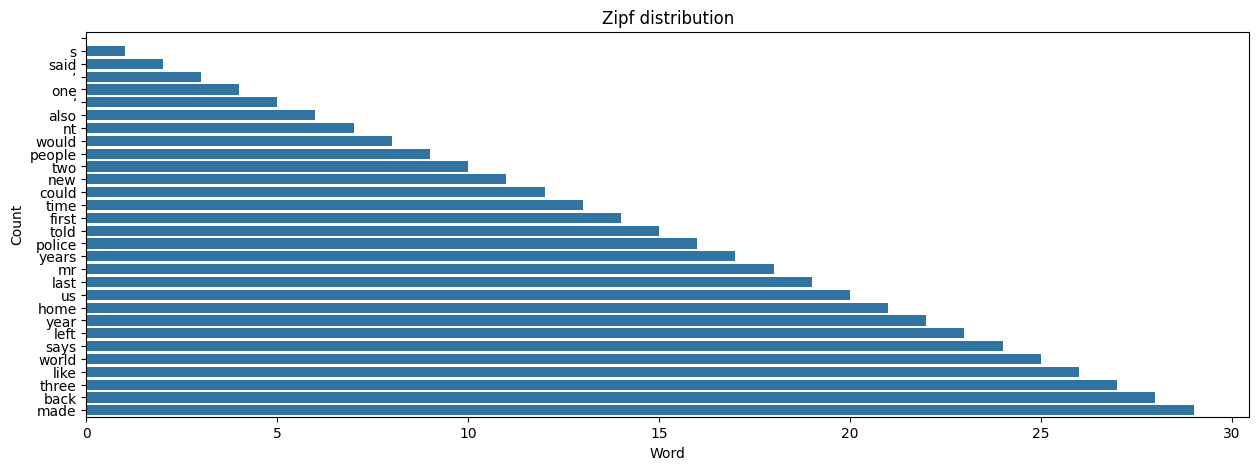

In [ ]:
zipf_distribution(stories[0])

# **Removing URL, HTML, brackets, digits**

In [ ]:
def remove_url(data):
    return [re.sub(r'https://','', sentence) for sentence in data]
def remove_html(data):
    return [BeautifulSoup(sentence, 'html.parser').get_text() for sentence in data]
def remove_bracket(data):
    return [re.sub(r'[\([{})\]]','', sentence) for sentence in data]
def remove_digit(data):
    return [re.sub('[0-9]','', sentence) for sentence in data]
def remove_underscore(data):
    return [sentence.replace("_","") for sentence in data]

# **Expanding Contractions**
Eg: he's -> he is

In [ ]:
!pip install contractions
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.8 MB/s eta 0:00:00


In [ ]:
def expand_contractions(sentence):
    contractions_expanded = [contractions.fix(word) for word in sentence.split()]
    return ' '.join(contractions_expanded)

# **Tokenize**
Splits the document into an array of words

In [ ]:
def tokenize(document):
    return word_tokenize(document)

# Converting to lower case, removing punctuations and stopwords

In [ ]:
def lower_case(tokens):
    return [word.lower() for word in tokens]
def remove_punctuation(tokens):
    return [re.sub(r'[^\w\s]', '', word) for word in tokens]
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stopwords and word]

# **Canonicalization**

* Lemmatization
* Stemming
* Soundex
* Edit distance




Getting the base form of each word. We chose lemmatization over stemming because stemming doesn’t give accurate results. Eg: for the word “scaling”, lemmatization gives “scale” while stemming gives “scal”.

Finding the base or root of a word is highly dependent on its part of speech. NLTK's word lemmatizer requires part of speech (POS) tag of a word, to lemmatize it.

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def pos_tags(tokenized):
    return nltk.tag.pos_tag(tokenized)

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def to_wordnet(tokenized_pos):
    return [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in tokenized_pos]

In [ ]:
def lemmatizer(tokenized_stories):
    lemmatized_stories = []
    for story in tokenized_stories:
        tokenized_pos = pos_tags(story)
        tokenized_pos = to_wordnet(tokenized_pos)
        wnl = WordNetLemmatizer()
        lemmatized_stories.append([wnl.lemmatize(word, tag) for word, tag in tokenized_pos])
    return lemmatized_stories

In [ ]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [ ]:
def stemming(text):
    return [porter_stemmer.stem(word) for word in text]

In [ ]:
def get_soundex(word):
    word = word.upper()
    soundex = ""
    soundex += word[0]
    dictionary = {"BFPV": "1", "CGJKQSXZ":"2", "DT":"3", "L":"4", "MN":"5", "R":"6", "AEIOUHWY":"."}

    for char in word[1:]:
        for key in dictionary.keys():
            if char in key:
                code = dictionary[key]
                if code != soundex[-1]:
                    soundex += code

    soundex = soundex.replace(".", "")
    soundex = soundex[:4].ljust(4, "0")
    return soundex

In [ ]:
def get_edit_distance(w1,w2):
    return nltk.edit_distance(w1, w2, transpositions=False)

# **Combining into a pipeline**

In [ ]:
def process(stories):
    stories = remove_url(stories)
    stories = remove_html(stories)
    stories = remove_bracket(stories)
    stories = remove_digit(stories)
    stories = remove_underscore(stories)

    processed_list = []
    for story in stories:
        processed = expand_contractions(story)
        processed = tokenize(processed)
        processed = lower_case(processed)
        processed = remove_punctuation(processed)
        processed = remove_stopwords(processed)
        processed_list.append(processed)

    return lemmatizer(processed_list)

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
processed_stories = process(stories[:10])
processed_stories

[['id',
  'article',
  'highlight',
  'dafcafaeafbccf',
  'associate',
  'press',
  'publish',
  'est',
  'october',
  'updated',
  'est',
  'october',
  'bishop',
  'fargo',
  'catholic',
  'diocese',
  'north',
  'dakota',
  'expose',
  'potentially',
  'hundred',
  'church',
  'member',
  'fargo',
  'grand',
  'fork',
  'jamestown',
  'hepatitis',
  'virus',
  'late',
  'september',
  'early',
  'october',
  'state',
  'health',
  'department',
  'issue',
  'advisory',
  'exposure',
  'anyone',
  'attend',
  'five',
  'church',
  'take',
  'communion',
  'bishop',
  'john',
  'folda',
  'picture',
  'fargo',
  'catholic',
  'diocese',
  'north',
  'dakota',
  'expose',
  'potentially',
  'hundred',
  'church',
  'member',
  'fargo',
  'grand',
  'fork',
  'jamestown',
  'hepatitis',
  'state',
  'immunization',
  'program',
  'manager',
  'molly',
  'howell',
  'say',
  'risk',
  'low',
  'official',
  'feel',
  'important',
  'alert',
  'people',
  'possible',
  'exposure',
  'dioc

# **Word2Vec**

In [ ]:
import gensim
from gensim.models import Word2Vec

In [ ]:
# model1 = gensim.models.Word2Vec(stories[0], min_count = 1,size = 100, window = 5, sg=0)
model = Word2Vec(processed_stories, min_count=1,vector_size= 50,workers=3, window =3, sg = 1)